# Choosing your prior(s)

In this chapter, we discuss the choice of the prior and discuss several types of priors, including _informative_, _weakly informative_, and _uniformative_ priors, along with providing examples of each. We also discuss seemingly paradoxical phenomena, such as the fact that the uniform prior is not uninformative, along with remedies. This is all important, as the prior distribution is one of the more contraversial aspects of Bayesian inference, which it need not be. One of the reasons it is perhaps contraversial is that it is not well-understood and we hope to make a small contribution in demystifying some of it here. Having said that, we do not necessarily expect anybody to have a good handle on the actual practice of choosing and using priors after merely reading this chapter. For that, you'll need to see many priors of a variety of forms used in different contexts, and there's plenty of that to come in the chapters that follow.

## The choice of the prior

In the small to medium data limit, the choice of prior can affect the posterior. We'll now introduce several types of priors and then we'll use one of them for the coin flip example from the previous chapter to see the impact of the prior:

- **Informative priors** express specific, definite information about a variable, for example, if we got a coin from the mint, we may use an informative prior with a peak at $p=0.5$ and small variance. 
- **Weakly informative priors** express partial information about a variable, such as a peak at $p=0.5$ (if we have no reason to believe the coin is biased), with a larger variance.
- **Uninformative priors** express no information about a variable, except what we know for sure, such as knowing that $0\leq p \leq1$.

Now you may think that the _uniform distribution_ is uninformative, however, what if I am thinking about this question in terms of the probability $p$ and you are thinking about it in terms of the _odds ratio_ $r=\frac{p}{1-p}$? You rightly feel that you have no prior knowledge as to what this $r$ is and thus choose the uniform prior on $r$.

With a bit of algebra (transformation of variables), we can show that choosing the uniform prior on $p$ amounts to choosing a decidedly non-uniform prior on $r$ and vice versa. So you and I have actually chosen different priors, using the same philosophy! How do we avoid this happening? Enter the **Jeffreys prior**, which is an uninformative prior that solves this problem. You can read more about the Jeffreys prior [here](https://en.wikipedia.org/wiki/Jeffreys_prior) & in your favourite Bayesian text book (Sivia gives a nice treatment). 

In the binomial (coin flip) case, the Jeffreys prior is given by $P(p) = \frac{1}{\sqrt{p(1-p)}}$.



## Comparing the uniform and Jeffreys priors

Recall that, in the previous chapter, we plotted the posterior distribution for $p(H)$ with a uniform prior, after simulating a number of coin flips. We'll now do this again, but we'll generate two posterior plots on the same figure, one using the uniform prior, the other using the Jeffreys prior. We'll do soon for differing sample sizes and our intention here is to demnstrate via simulated example that the choice of prior matters less as you collect more data. We'll start off by defining a function analogous to the one we defined in the previous chapter:

In [1]:
#| output: false
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
import arviz as az
from generative_thinking.utils import ecdf
%matplotlib inline
sns.set()

/Users/hba/opt/anaconda3/envs/generative-thinking/lib/python3.9/site-packages/aesara/link/jax/dispatch.py:87: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/Users/hba/opt/anaconda3/envs/generative-thinking/lib/python3.9/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [2]:

def plot_posteriors_flip(p=0.6, N=0):
    np.random.seed(42)
    n_successes = np.random.binomial(N, p)
    x = np.linspace(0.01, 0.99, 100)
    posterior1 = x**n_successes*(1-x)**(N-n_successes)  # w/ uniform prior
    posterior1 /= np.max(posterior1)  # so that peak always at 1
    plt.plot(x, posterior1, label='Uniform prior')
    jp = np.sqrt(x*(1-x))**(-1)  # Jeffreys prior
    posterior2 = posterior1*jp  # w/ Jeffreys prior
    posterior2 /= np.max(posterior2)  # so that peak always at 1 (not quite correct to do; see below)
    plt.plot(x, posterior2, label='Jeffreys prior')
    plt.legend()
    plt.show()

Let's now plot both posteriors for combinations of $p=0.5$ and $N\in\{0, 5, 10, 20\}$:

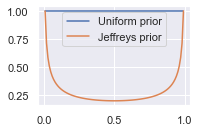

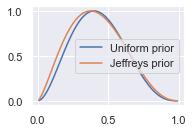

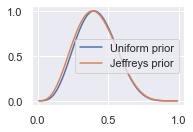

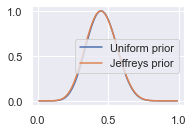

In [3]:
plt.subplot(2, 2, 1)
plot_posteriors_flip(p=0.5, N=0);
plt.subplot(2, 2, 2)
plot_posteriors_flip(p=0.5, N=5);
plt.subplot(2, 2, 3)
plot_posteriors_flip(p=0.5, N=10);
plt.subplot(2, 2, 4)
plot_posteriors_flip(p=0.5, N=20);


Even for merely 10 data points, the posteriors are quite close. For 20 data points, the posteriors are indistinguishable to the naked eye! We once again encourage the reader to play around with the code and what happens for different values of $p$ and $N$. If you're doing this in a Jupyter notebook, you can use the great ipywidget interact again!

In [4]:
interact(plot_posteriors_flip, p=(0, 1, 0.01), N=(0, 100));

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…

### The hidden powers of the beta distribution

We have seen how the beta distribution can be used as a prior in an Empirical Bayes setting. We have also seen how we can use the beta distribution to assign probabilities on unknown probalities, which makes it clear why it's useful for the prior distribution.

And, in fact, several common priors, including two that we've already seen, are special cases of the beta distribution:

- The uniform prior is $\beta (1, 1)$;
- Jeffreys' prior is $\beta(0.5, 0.5)$;
- A prior known as Haldane's prior is $\beta(0, 0)$. 

Let's simulate $\beta (1, 1)$ and plot a histogram to see if it looks at all uniform:

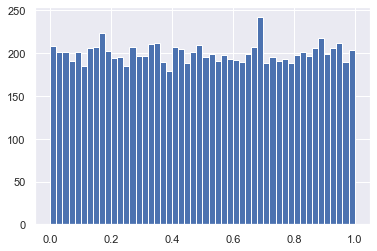

In [5]:
# Uniform
a, b = 1, 1
rng = np.random.default_rng(42)
samples_1 = rng.beta(a, b, 10**4)
plt.hist(samples_1, bins=50);

Let's also plot the ECDF of this data with that of data simulated from a uniform distribution:

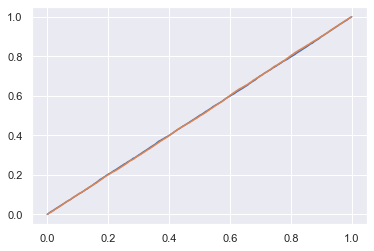

In [6]:
samples_2 = rng.random(10**4)

x_1, y_1 = ecdf(samples_1)
x_2, y_2 = ecdf(samples_2)

plt.plot(x_1, y_1)
plt.plot(x_2, y_2);

These ECDFs are extremely close, when inspected by eye, and they are both linear with a slope of 1, which is what we would expect of the uniform distribution. Let's now simulate $\beta(0.5, 0.5)$ and plot the resulting histogram to see if it looks anything like the Jeffreys distribution, which indeed it does:

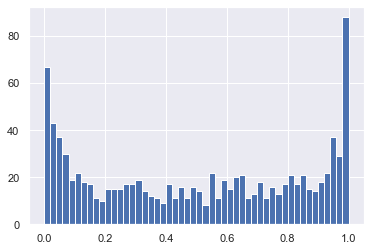

In [7]:
# Jeffrey's
a, b = 0.5, 0.5
samples = rng.beta(a, b, 10**3)
plt.hist(samples, bins=50);

## Wrapping up

In this chapter, we delved into the different types of prior distributions, to give a sense of what the possibilities look like. Using simulation, we showed an example in which generating more data leads to different common posterior distributions converging. We also showed how several common posteriors are special cases of the beta distribution. As stated earlier, we do not necessarily expect anybody to have a good handle on the actual practice of choosing and using priors after merely reading this chapter. For that, you'll need to see many priors of a variety of forms used in different contexts, and there's plenty of that to come in the chapters that follow. So let us begin building our inferential machines!